# **Herramientas de econometría: Clase 1**

##**Preparación del entorno**

Importamos las librerías que necesitaremos

In [9]:
import numpy as np                          # analisis numérico 
import pandas as pd                         # manejo de datos
import statsmodels.api as sm                # modelos estadísticos
import statsmodels.stats.api as sms         # módulo stats de statsmodels
import matplotlib.pyplot as plt             # gráficos básicos
import seaborn as sns                       # gráficos más avanzados
%matplotlib inline
plt.style.use("seaborn-white")

##**Importación y exploración de los datos**

Utilizaremos datos de un ejemplo de Gujarati y Porter (2010) que están guardados en el archivo GuajartiPorter71.txt

Importamos la base de datos en un data frame

In [10]:
path = 'https://drive.google.com/uc?export=download&id=1jV5k9TcTpOzQT1l-hfOc5n617Lwh3-WV'
data = pd.read_csv(path, sep = " ", delimiter = "\t")

Inspeccionamos un poco la base revisando algunas observaciones al azar

In [3]:
data.sample(5)

,CM,FLR,PGNP,TFR
44,37,88,1730,3.46
63,142,67,560,7.20
29,27,63,19830,5.23
21,189,35,270,5.05
23,12,81,4240,1.80


Los significados de las variables son los siguientes:

* **CM**: child mortality (mortalidad infantil, fallecimientos en un año de niños menores a 5 años por cada 1000 nacidos vivos)
* **FLR**: female literacy rate (tasa de alfabetización de las mujeres)  
* **PGNP**: Per cápita Gross National Product (PIB per cápita en 1980)
* **TFR**: total fertility rate (tasa de fecundidad total)

Vemos cuál es la dimensión completa del data frame

In [4]:
data.shape

(64, 4)

Observar que tenemos más observaciones que variables, requisito fundamental para que X sea de rango completo y podamos estimar modelos de regresión por OLS.

Identificamos los tipos de datos

In [5]:
data.dtypes

CM        int64
FLR       int64
PGNP      int64
TFR     float64
dtype: object

Los resultados "int64" indican números enteros, "float64" números decimales

Podemos pedir información más detallada

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CM      64 non-null     int64  
 1   FLR     64 non-null     int64  
 2   PGNP    64 non-null     int64  
 3   TFR     64 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 2.1 KB


En "RangeIndex" se nota muy bien que la indexación en Python es base cero.

En "Non-Null Count" podemos ver que no hay datos perdidos.

En "memory usage" vemos cuánto espacio ocupan los datos.

Obtenemos ahora un resumen de estadística descriptiva

In [7]:
data.describe()

,CM,FLR,PGNP,TFR
count,64.000000,64.000000,64.000000,64.000000
mean,141.500000,51.187500,1401.250000,5.549687
std,75.978067,26.007859,2725.695775,1.508993
min,12.000000,9.000000,120.000000,1.690000
25%,82.000000,29.000000,300.000000,4.607500
50%,138.500000,48.000000,620.000000,6.040000
75%,192.500000,77.250000,1317.500000,6.615000
max,312.000000,95.000000,19830.000000,8.490000


Observar que ninguna variable tiene desviación estándar nula (¡son variables!)

Nada impide entonces la búsqueda de relaciones entre las variables

##**Análisis de regresión lineal múltiple**

###**Especificación**

Supongamos que nos interesa relacionar CM (mortalidad infantil) en función de las variables FLR (tasa de alfabetización de las mujeres), PGNP (PIB per cápita) y TFR (tasa de fertilidad).

Primero conviene examinar visualmente la relación entre las variables de interés con un diagrama de dispersión (scatterplot)

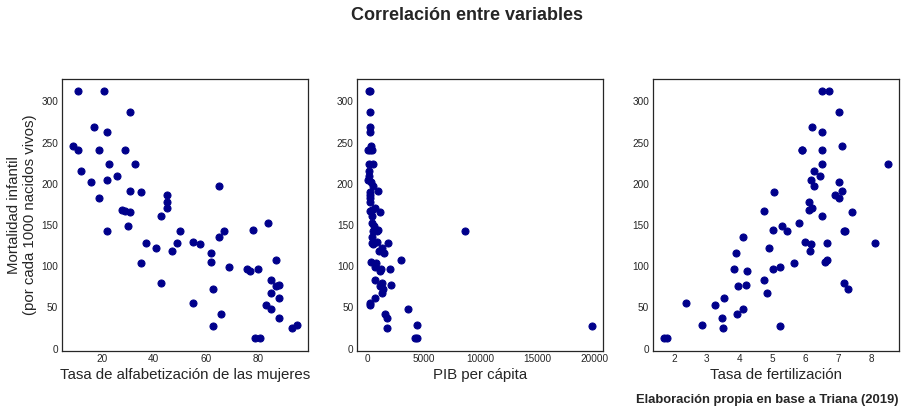

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5))       # crea una figura con tres gráficos en una grilla de 1x3
fig.suptitle("Correlación entre variables", fontsize = 18, fontweight = "bold", y = 1.08)
ax1.scatter(data["FLR"], data["CM"], s = 50, color = "darkblue")
ax2.scatter(data["PGNP"], data["CM"], s = 50, color = "darkblue")
ax3.scatter(data["TFR"], data["CM"], s = 50, color = "darkblue")
ax1.set_xlabel("Tasa de alfabetización de las mujeres", fontsize = 15)
ax1.set_ylabel("Mortalidad infantil\n(por cada 1000 nacidos vivos)", fontsize = 15)
ax2.set_xlabel("PIB per cápita", fontsize = 15)
ax3.set_xlabel("Tasa de fertilización", fontsize = 15)
fig.text(.9,-.02, "Elaboración propia en base a Triana (2019)", fontsize = 13, fontweight = "bold", ha = "right")
plt.show()

La mortalidad parece estar negativamente relacionada con FLR y PGNP, y positivamente con TFR.

Para cuantificar estas relaciones a través de un modelo estimado por OLS, primero es conveniente asignar las variables a objetos. De esta manera quedará un código más limpio.

In [11]:
Y = data["CM"]
X = data[["FLR", "PGNP", "TFR"]]

###**Estimación**

Ahora podemos usar estos objetos como argumentos para estimar nuestro modelo por OLS utilizando la función `OLS()` de la librería `statsmodels`, pero esta función sólo permite especificar el modelo.

Para estimar los parámetros y mostrar los resultados es necesario recurrir a los métodos `fit()` y `summary()`

In [12]:
MiModelo = sm.OLS(Y, sm.add_constant(X))  # Construimos el modelo (agregando una constante con add_constant de Statsmodels)
Resultados = MiModelo.fit()               # Estimamos el modelo y guardamos los resultados
print(Resultados.summary())               # Mostramos los resultados

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     59.17
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           6.46e-18
Time:                        14:29:48   Log-Likelihood:                -323.43
No. Observations:                  64   AIC:                             654.9
Df Residuals:                      60   BIC:                             663.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        168.3067     32.892      5.117      0.0

`fit()` y `summary()` son métodos aplicables a objetos generados por la función OLS()

Para ver el listado completo de métodos y atributos aplicables al objeto creado se puede usar la función nativa `dir()`

In [ ]:
dir(Resultados)   # Para ver métodos y atributos disponibles para el objeto Resultados

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


Conociendo estos métodos y atributos se pueden obtener resultados más específicos.

Veamos algunos ejemplos...

In [13]:
print("Los coeficientes del modelo son:\n", Resultados.params)   # muestra solo los coeficientes estimados

Los coeficientes del modelo son:
 const    168.306690
FLR       -1.768029
PGNP      -0.005511
TFR       12.868636
dtype: float64


Observar el signo de los coeficientes estimados: se ratifican las relaciones que visualizamos inicialmente (negativas de CM con FLR y PGNP y positiva entre CM y TFR).

###**Diagnóstico: contrastes básicos**

En la salida completa del modelo también se pueden analizar los resultados de los contrastes t de significación individual de variables explicativas y del contraste F de validez global. Todos los coeficientes de las variables explicativas resultaron significativamente distintos de 0, con p-values menores a 1%, incluida la constante. Lo mismo el modelo en forma global.

Una medida de diagnóstico habitual también es el $R^2$ del modelo, cuyo resultado, si lo queremos aparte de la salida anterior, podemos obtener de la siguiente manera.

In [14]:
print("El R2 del modelo es:", Resultados.rsquared)   # muestra solo el R2

El R2 del modelo es: 0.7473716213663544


Significa que el 74,73% de la variabilidad observada en la mortalidad infantil (CM) está asociada en forma lineal con las variables explicativas propuestas por nuestro modelo.

###**Diagnóstico: verificación de supuestos sobre la estructura del modelo**

###**Problemas de especificación**

Examinemos primero si la especificación es correcta mediante un gráfico de residuos vs. valores ajustados

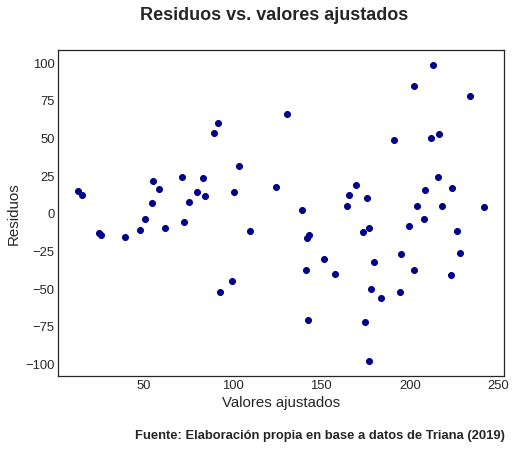

In [15]:
Residuos = Resultados.resid                    # guardamos los residuos
Valores_ajustados = Resultados.predict()       # guardamos los valores ajustados
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle("Residuos vs. valores ajustados", fontsize = 18, fontweight = "bold")
ax.scatter(Valores_ajustados, Residuos, color = "darkblue")
ax.set_xlabel("Valores ajustados", fontsize = 15)
ax.set_ylabel("Residuos", fontsize = 15)
ax.tick_params(labelsize = 13)
fig.text(.9,-.02, "Fuente: Elaboración propia en base a datos de Triana (2019)", fontsize = 13, fontweight = "bold", ha = "right")
plt.show()

No parece haber un patrón específico en los residuos y los valores parecen simétricamente distribuidos por encima y por debajo del cero.

Si queremos estar más seguros podemos realizar el **test RESET** de Ramsey. Se puede hacer con la función `reset_ramsey()` que viene en el módulo `stats.outliers_influence` de `Statsmodels`. 

In [16]:
from statsmodels.stats.outliers_influence import reset_ramsey   # importamos la función
ResultadosTestRESET = reset_ramsey(Resultados, degree=3)
print(ResultadosTestRESET)

<F test: F=array([[3.3878302]]), p=0.040594592079518634, df_denom=58, df_num=2>


El resultado que obtuvimos es un objeto de tipo `ContrastResults()` que incluye como atributos al estadístico F, al p-value y a los grados de libertad del contraste. Para presentar de una manera más agradable estos resultados podemos hacer lo siguiente...

In [17]:
Estadístico = ResultadosTestRESET.statistic[0].item(0)         # extraemos y guardamos el estadístico F
pvalue = ResultadosTestRESET.pvalue.item(0)                    # extraemos y guardamos el p-value
Nombres = ["Estadístico", "p-value"]                           # asignamos nombres para armar la tabla de resultados
pd.Series([Estadístico, round(pvalue, 5)], index = Nombres)    # armamos una tabla con los resultados

Estadístico    3.38783
p-value        0.04059
dtype: float64

Los resultados del test RESET de Ramsey parecen indicar que agregar términos cuadráticos y cúbicos podría mejorar la regresión.

También podemos probar con el **test Rainbow** que se puede realizar con la función `linear.rainbow()` del módulo `stats` de la librería `statsmodels` que ya tenemos cargada.

In [18]:
ResultadosTestRainbow = sms.linear_rainbow(Resultados)
print(ResultadosTestRainbow)

(0.6272643146138834, 0.8984650051286099)


El primer número de estos resultados es el valor del estadístico observado de la prueba, el segundo es el p-value.  

Para mejorar esta salida podemos utilizar el siguiente código.

In [19]:
ResultadosTestRainbow = sms.linear_rainbow(Resultados)
Nombres = ["Estadístico F", "p-value"]
pd.Series(ResultadosTestRainbow, index = Nombres)

Estadístico F    0.627264
p-value          0.898465
dtype: float64

Con el test Rainbow no se encuentra problema de especificación alguno.

###**Multicolinealidad**

Examinemos ahora que no haya **multicolinealidad** observando la correlación entre las variables del data frame

In [20]:
data.corr()

,CM,FLR,PGNP,TFR
CM,1.000000,-0.818285,-0.407697,0.671135
FLR,-0.818285,1.000000,0.268530,-0.625954
PGNP,-0.407697,0.268530,1.000000,-0.185718
TFR,0.671135,-0.625954,-0.185718,1.000000


La correlación más alta (-0.81) es entre CM y FLR, pero CM es la variable dependiente. No hay correlaciones altas entre las variables explicativas del modelo.

Si queremos utilizar una herramienta visual, podemos recurrir a un mapa de calor (heat map) para las correlaciones.

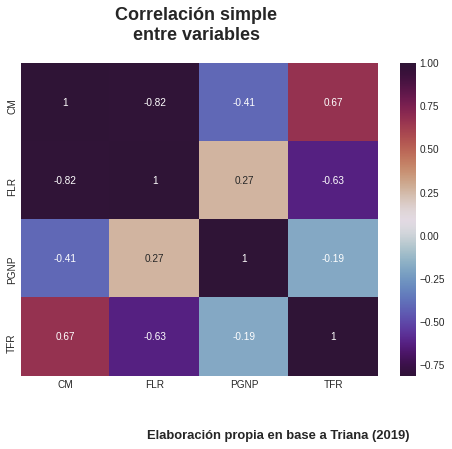

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
fig.suptitle("Correlación simple\nentre variables", fontsize = 18, fontweight = "bold", x = 0.43)
sns.heatmap(data.corr(), ax = ax, cmap = "twilight_shifted", annot = True)      # la opción cmap = "twilight_shifted" controla los colores
plt.subplots_adjust(top = 0.85)                                                 # annot = True agrega los coeficientes de correlación
fig.text(.8,-.02, "Elaboración propia en base a Triana (2019)", fontsize = 13, fontweight = "bold", ha = "right")
plt.show()

También podemos verificar la ausencia de multicolinealidad calculando los **factores de inflación de varianza (VIF)** con la función `variance_inflation_factor` del módulo `stats.outliers_influence` de la librería `Statsmodels`.

Para no tener que calcular uno para cada variable explicativa, podemos usar un for loop.

La función `variance_inflation_factor` requiere como argumentos una matriz de exógenas del modelo y la indicación de sobre cuál de estas variables hay que calcular el VIF. 

Lo que haremos entonces es exhibir los resultados en una tabla (data frame) con los nombres de las variables (excepto la constante) en la primera columna y los VIF en la segunda, calculados de manera iterativa con el for loop usando a cada columna de la matriz de exógenas excepto la constante.

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor      # importamos la función
exog = sm.add_constant(X)                                                       # definimos las exógenas (más una constante)
pd.DataFrame({'Variables':exog.columns[1:], 'VIF':[variance_inflation_factor(exog.values, i+1) 
                                                   for i in range(len(exog.columns[1:]))]})

,Variables,VIF
0,FLR,1.711845
1,PGNP,1.078306
2,TFR,1.645150


Observar que ninguno de los VIF es demasiado alto, confirmando la ausencia de multicolinealidad.

###**Quiebre estructural**

Pongamos a prueba ahora la **estabilidad de los parámetros** mediante contrastes de **quiebre estructural**. 

Como no tenemos idea previa sobre algún posible quiebre, podemos aplicar el contraste **CUSUM** basado en los residuos recursivos. Esta prueba se puede hacer en Python con la función `breaks_cusumolsresid()` de la librería `statsModels` aplicada sobre el objeto en el que guardamos los residuos obtenidos por OLS.

In [22]:
ResultadosTestCUSUM = sms.breaks_cusumolsresid(Residuos)
print(ResultadosTestCUSUM)

(0.40366658162735186, 0.9968015398003462, [(1, 1.63), (5, 1.36), (10, 1.22)])


El primer número de los resultados es el valor del estadístico observado de la prueba, el segundo es el p-value y los últimos tres son los valores críticos para los niveles de significación 1%, 5% y 10%.  

Para mejorar la presentación de estos resultados podemos utilizar el siguiente código.

In [23]:
Nombres = ["Estadístico", "p-value del estadístico", "Valores críticos"]
pd.Series(ResultadosTestCUSUM, index = Nombres)

Estadístico                                          0.403667
p-value del estadístico                              0.996802
Valores críticos           [(1, 1.63), (5, 1.36), (10, 1.22)]
dtype: object

Observando que el estadístico de la prueba es menor a cualquiera de los valores críticos, o que el p-value es bastante mayor a cualquiera de los niveles de significación, podemos concluir que no debe rechazarse la hipótesis nula de **estabilidad estructural**.

La desventaja de utilizar la función `breaks_cusumolsresid()` es que no muestra el gráfico del test CUSUM. Este gráfico es muy útil porque, si hubiera quiebres estructurales, permite identificar en qué momentos u observaciones se producen estos quiebres. Para resolver este problema se puede recurrir a la función `recursive_olsresiduals()` que sirve para calcular y guardar los residuos recursivos y muchos de los estadísticos asociados, por ejemplo el estadístico CUSUM y sus límites de confianza. 

In [ ]:
ResultadosRR = sms.recursive_olsresiduals(Resultados, alpha=0.95)   # sirve para crear las series de residuos recursivos (rresid),
                                                                    # parámetros recursivos (rparams), valores predichos recursivos (rypred),
                                                                    # residuos recursivos estandarizados (rresid_standardized),
                                                                    # residuos recursivos escalados (rresid_scaled)
                                                                    # suma acumulada de residuos recursivos para el test CUSUM (rcusum) y
                                                                    # los límites de confianza para el test CUSUM (rcusumci) con el alpha especificado

El resultado del código anterior es una tupla de Python cuyos elementos resulta conveniente agrupar en un data frame indexado para que podamos utilizarlos luego de manera más sencilla.

In [ ]:
Nombres = ["rresid", "rparams", "rypred", "rresid_standardized", "rresid_scaled", "rcusum", "rcusumci"]
frame = pd.Series(ResultadosRR, index = Nombres)

Ahora sí, veamos cómo se puede obtener el gráfico del test CUSUM.

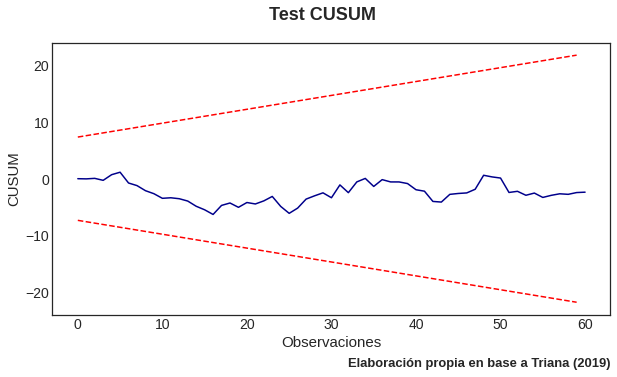

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle("Test CUSUM", fontsize = 18, fontweight = "bold")
ax.plot(frame.rcusum, color = "darkblue")
ax.plot(frame.rcusumci[0], color = "red", linestyle = '--')
ax.plot(frame.rcusumci[1], color = "red", linestyle = '--')
ax.set_xlabel("Observaciones", fontsize = 15)
ax.set_ylabel("CUSUM", fontsize = 15)
ax.tick_params(labelsize = 14)
fig.text(.9,-.02, "Elaboración propia en base a Triana (2019)", fontsize = 13, fontweight = "bold", ha = "right")
plt.show()

Como ya sabíamos de antemano, no hay indicio alguno de quiebre estructural porque en ningún momento el estadístico CUSUM cruzó alguno de los límites de la banda de confianza, ni tampoco muestra alguna tendencia o patrón no aleatorio alrededor de la media igual a cero.